In [155]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from src.wmfact import WeightedMatrixFactorization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data loading and preprocessing
In this section, we load the rating and movie data from CSV files and preprocess it to create the feedback matrix.

In [2]:
# Read data
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')

print("Ratings", ratings.shape)
print("Movies", movies.shape)

Ratings (100000, 3)
Movies (1682, 2)


The ratings dataset includes three columns (user_id, movie_id, rating). Each row represents a single rating given by a user to a particular movie.
The movies dataset, instead, contains information about the movies themselves (movie_id, title). Each row represents a single movie in the dataset.

### Creating the Feedback Matrix
In this section, we create a feedback matrix from the ratings data. The feedback matrix represents the ratings given by users for different movies.

In [27]:
feedbacks = ratings.pivot_table(values='rating', index=['user_id'], columns=['movie_id']).values
display(feedbacks)
print("feedbacks matrix shape: ", feedbacks.shape)

array([[ 5.,  3.,  4., ..., nan, nan, nan],
       [ 4., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 5., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan,  5., nan, ..., nan, nan, nan]])

feedbacks matrix shape:  (943, 1682)


## Weighted Matrix Factorization model

The Weighted Matrix Factorization model aims to factorize the sparse feedback matrix into low-rank user and item matrices, capturing underlying patterns in the data to predict missing ratings. In this implementation, we utilize the Weighted Alternating Least Squares (WALS) algorithm, which iteratively updates user and item embeddings to minimize the reconstruction error of observed ratings, while applying regularization to prevent overfitting.

- **n_iter**: The number of iterations for model fitting. Higher values may lead to better convergence but also increase computational cost.
- **n_latents**: The number of latent factors. A higher number allows the model to capture more complex patterns but may also increase the risk of overfitting.
- **lambda_reg**: The regularization parameter λ. It controls the extent of regularization applied to the model. Higher values of λ lead to stronger regularization.


In [153]:
# create the model
model = WeightedMatrixFactorization(feedbacks, n_iter=15, n_latents=300, lambda_reg=0.03)
history = model.fit(seed=42)

* Fitting the model with wals method: n_iter = 15, n_latents = 300, lambda_reg = 0.03 *


100%|██████████| 15/15 [14:50<00:00, 59.36s/it, loss=6302.36]


In [164]:
timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
print('Saved with timestamp:', timestamp)
model.save('./models/model_{}.pkl'.format(timestamp))

Saved with timestamp: 20240205183508


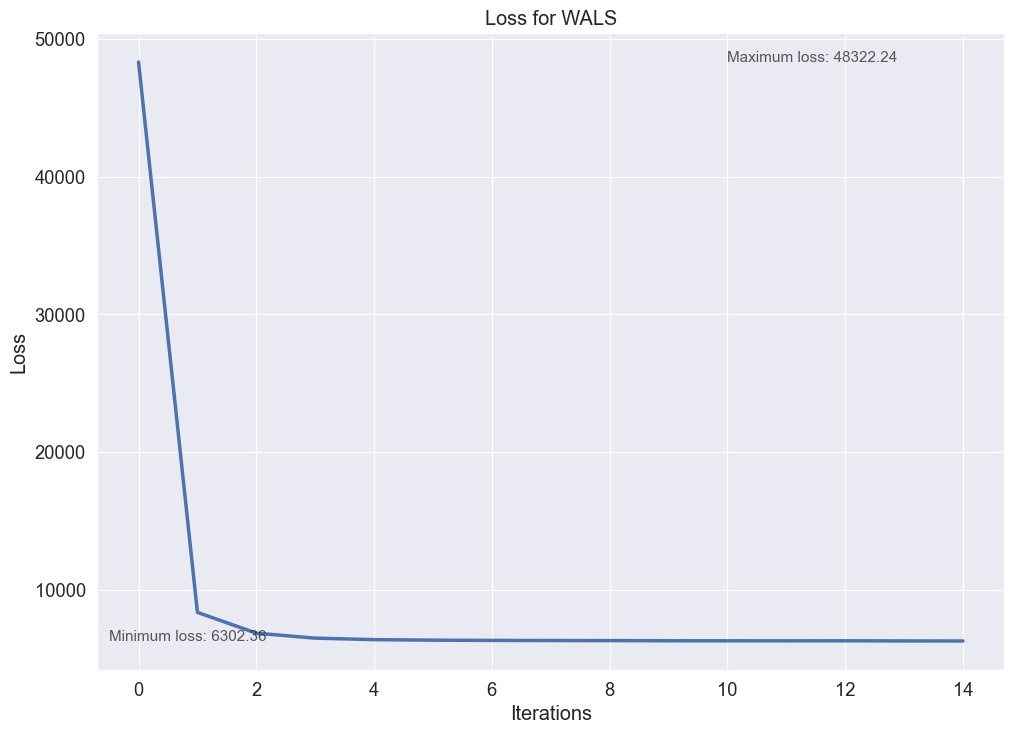

In [162]:
# sns settings
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context('paper', font_scale=1.5, rc={"lines.linewidth": 2.5})


lists = sorted(history.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

# lineplot 
sns.lineplot(x=list(history.keys()), y=list(history.values()))

# text for the minimum value with loss truncated to 3 decimals
plt.text(-0.5, min(history.values())-0.05, f"Minimum loss: {min(history.values()):.2f}", fontsize=11, alpha=0.75)
# text for the maximum value with loss truncated to 3 decimals
plt.text(10, max(history.values())+0.01, f"Maximum loss: {max(history.values()):.2f}", fontsize=11, alpha=0.75)

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss for WALS")
plt.show()

In [ ]:
# predict a rating for a user and a movie
user_id = 1
movie_id = 1
rating = model.predict(user_id, movie_id)
print(f"Predicted rating for user {user_id} and movie {movie_id} is {rating}")
print(f"Actual rating for user {user_id} and movie {movie_id} is {feedbacks[user_id, movie_id]}")

Predicted rating for user 1 and movie 1 is 0.6031591099770597
Actual rating for user 1 and movie 1 is nan
